<a href="https://colab.research.google.com/github/abhi-js/DS-MAY-15/blob/main/1606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [4]:
beml_def = pd.read_csv("/content/BEML.csv")
beml_def[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [7]:
glaxo_def = pd.read_csv("/content/GLAXO.csv")
glaxo_def[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [10]:
beml_def = beml_def[['Date', 'Close']]
glaxo_def = beml_def[['Date', 'Close']]

In [11]:
beml_def

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [13]:
'''DataFrames have a Date column  so we are setting date as a index'''
glaxo_def = glaxo_def.set_index(pd.DatetimeIndex(glaxo_def['Date']))
beml_def = beml_def.set_index(pd.DatetimeIndex(glaxo_def['Date']))

In [14]:
glaxo_def

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


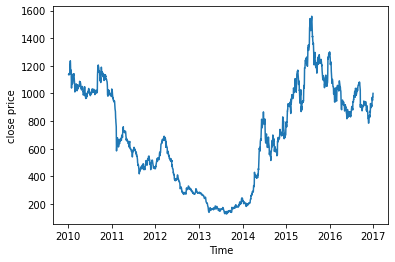

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_def.Close);
plt.xlabel('Time');
plt.ylabel('close price');

Text(0, 0.5, 'close price')

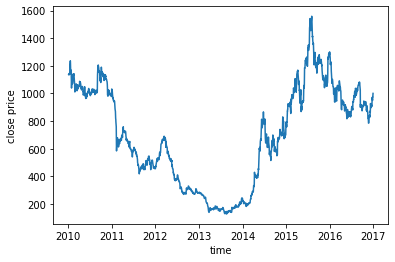

In [20]:
plt.plot(beml_def.Close)
plt.xlabel('time')
plt.ylabel('close price')

In [21]:
glaxo_def['gain'] = glaxo_def.Close.pct_change(periods=1)
beml_def['gain'] = beml_def.Close.pct_change(periods=1)

In [22]:
glaxo_def['gain']

Date
2010-01-04         NaN
2010-01-05   -0.000881
2010-01-06    0.004407
2010-01-07    0.003993
2010-01-08   -0.000087
                ...   
2016-12-26   -0.021924
2016-12-27    0.026782
2016-12-28   -0.001332
2016-12-29    0.011956
2016-12-30    0.014756
Name: gain, Length: 1739, dtype: float64

In [23]:
beml_def['gain']

Date
2010-01-04         NaN
2010-01-05   -0.000881
2010-01-06    0.004407
2010-01-07    0.003993
2010-01-08   -0.000087
                ...   
2016-12-26   -0.021924
2016-12-27    0.026782
2016-12-28   -0.001332
2016-12-29    0.011956
2016-12-30    0.014756
Name: gain, Length: 1739, dtype: float64

In [24]:
'''drop now applicable value[NAN]'''
glaxo_def = glaxo_def.dropna()
beml_def = beml_def.dropna()


In [25]:
glaxo_def

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


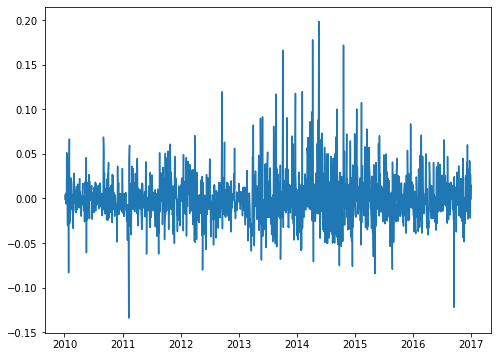

In [26]:
from IPython.core.pylabtools import figsize
#plot gains
plt.figure(figsize=(8,6))
plt.plot(glaxo_def.index, glaxo_def.gain)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


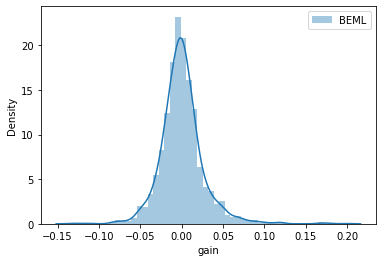

In [30]:
sn.distplot(glaxo_def.gain, label='BEML')
plt.legend()

In [33]:
print('mean:', glaxo_def.gain.mean, 4)
print('standard deviation: ', glaxo_def.gain.std)

mean: <bound method NDFrame._add_numeric_operations.<locals>.mean of Date
2010-01-05   -0.000881
2010-01-06    0.004407
2010-01-07    0.003993
2010-01-08   -0.000087
2010-01-11   -0.006162
                ...   
2016-12-26   -0.021924
2016-12-27    0.026782
2016-12-28   -0.001332
2016-12-29    0.011956
2016-12-30    0.014756
Name: gain, Length: 1738, dtype: float64> 4
standard deviation:  <bound method NDFrame._add_numeric_operations.<locals>.std of Date
2010-01-05   -0.000881
2010-01-06    0.004407
2010-01-07    0.003993
2010-01-08   -0.000087
2010-01-11   -0.006162
                ...   
2016-12-26   -0.021924
2016-12-27    0.026782
2016-12-28   -0.001332
2016-12-29    0.011956
2016-12-30    0.014756
Name: gain, Length: 1738, dtype: float64>


In [45]:
from scipy import stats
import scipy
stats.norm.cdf( -0.02, loc= glaxo_def.gain.mean(), scale= glaxo_def.gain.std())


0.22155987503755292

In [46]:
from scipy import stats
import scipy
stats.norm.cdf( 0.02, loc= glaxo_def.gain.mean(), scale= glaxo_def.gain.std())

0.7723017051592466